In [35]:
import pyhf
import json
import cabinetry

## The Inputs

In this notebook we will now use the patch file and then modify the
background-only with it.

In [38]:
BkgOnlyModelPath = 'BS_only.json'
PatchPath = 'patch_from_cabinetry.json'

In this step we load two JSON files
* the one associated with the Background-only workspace
* the patch file that has the new signal yields

In [43]:
bkg_only_model = json.load(open(BkgOnlyModelPath))
patch = json.load(open(PatchPath))


Now, we will use `pyhf` APIs to create a *new* signal+background workspace
by passing the patch

Importantly, we are setting the parameter of interest to `mu_Signal`
in anticipation of the running the fit.

In [44]:
ws = pyhf.Workspace(bkg_only_model)
model = ws.model(patches = [patch])
model.config.set_poi('mu_Signal')
data = ws.data(model)

Now we got a new signal + background workspace and we can run the limit fit and create the RECAST result

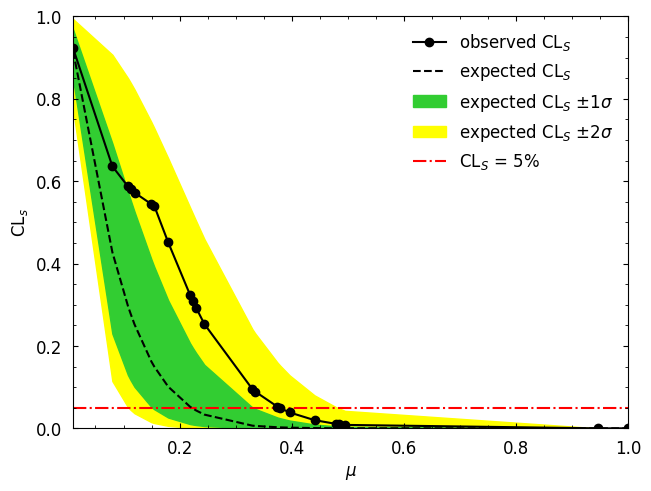

In [45]:
limitresults = cabinetry.fit.limit(model, data, bracket=[0.01,1.0])
cabinetry.visualize.limit(limitresults)

## The Upper Limit

In [49]:
limitresults.observed_limit

0.3793891757627174